# Prosper Loan Data Exploration
## by Artyom Chernyaev

## Preliminary Wrangling

> This data set contains information on loans obtained via p2p credit company Prosper

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Let's load data set and do some initial wrangling:

In [2]:
df = pd.read_csv('prosperLoanData.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [9]:
df.sample(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
23809,052F35927286119793C015F,952463,2013-10-11 19:51:48.147000000,NaN,60,Current,NaN,0.21576,0.1915,0.1815,...,-49.78,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
107450,D90D35766668639671EF459,761443,2013-04-25 18:59:13.683000000,NaN,36,Current,NaN,0.23121,0.1939,0.1839,...,-150.60,0.0,0.0,0.0,0.0,1.0,0,0,0.0,2
35538,02FF3503934447379B98500,490153,2011-01-08 11:21:25.790000000,NaN,36,Completed,2012-03-23 00:00:00,0.29510,0.2599,0.2499,...,-66.69,0.0,0.0,0.0,0.0,1.0,0,0,0.0,147
4786,4AB233870251880625C7C76,128096,2007-04-24 13:04:30.480000000,AA,36,Completed,2009-02-23 00:00:00,0.10542,0.0985,0.0935,...,-31.92,0.0,0.0,0.0,0.0,1.0,0,0,0.0,95
69634,35CF359568184503837E05F,1007920,2013-11-21 09:50:03.520000000,NaN,36,Current,NaN,0.32446,0.2850,0.2750,...,-9.80,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


Note that this data set contains 81 columns. For the purpose of this analysis let's take only some of them:

In [41]:
target_columns =  [
    'Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus',
    'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate', 'Recommendations', 'InvestmentFromFriendsAmount'
]

In [42]:
target_df = df[target_columns]

In [43]:
target_df.sample(5)

,Term,LoanStatus,BorrowerRate,ProsperRating (Alpha),ListingCategory (numeric),EmploymentStatus,DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans,LoanOriginalAmount,LoanOriginationDate,Recommendations,InvestmentFromFriendsAmount
57971,36,Completed,0.2900,NaN,0,NaN,19.0,6666.666667,NaN,1000,2006-09-28 00:00:00,0,0.0
19550,36,Completed,0.0880,NaN,2,Full-time,0.0,7916.666667,NaN,10000,2008-09-10 00:00:00,0,0.0
99398,36,Completed,0.1399,NaN,0,Full-time,0.0,1500.000000,NaN,4000,2007-03-15 00:00:00,0,0.0
107912,60,Current,0.2769,E,7,Employed,23.0,4416.666667,NaN,10000,2013-10-17 00:00:00,0,0.0
61592,60,Current,0.1520,B,3,Employed,3.0,5923.000000,NaN,20000,2013-11-12 00:00:00,0,0.0


In [44]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
Term                           113937 non-null int64
LoanStatus                     113937 non-null object
BorrowerRate                   113937 non-null float64
ProsperRating (Alpha)          84853 non-null object
ListingCategory (numeric)      113937 non-null int64
EmploymentStatus               111682 non-null object
DelinquenciesLast7Years        112947 non-null float64
StatedMonthlyIncome            113937 non-null float64
TotalProsperLoans              22085 non-null float64
LoanOriginalAmount             113937 non-null int64
LoanOriginationDate            113937 non-null object
Recommendations                113937 non-null int64
InvestmentFromFriendsAmount    113937 non-null float64
dtypes: float64(5), int64(4), object(4)
memory usage: 11.3+ MB


Since Prosper use their propriatery Prosper Rating only since 2009, we have a bunch of missing values in apropriate column. Let's drop these missing values:

In [48]:
target_df = target_df.dropna(subset=['ProsperRating (Alpha)']).reset_index()

In [49]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 14 columns):
index                          84853 non-null int64
Term                           84853 non-null int64
LoanStatus                     84853 non-null object
BorrowerRate                   84853 non-null float64
ProsperRating (Alpha)          84853 non-null object
ListingCategory (numeric)      84853 non-null int64
EmploymentStatus               84853 non-null object
DelinquenciesLast7Years        84853 non-null float64
StatedMonthlyIncome            84853 non-null float64
TotalProsperLoans              19797 non-null float64
LoanOriginalAmount             84853 non-null int64
LoanOriginationDate            84853 non-null object
Recommendations                84853 non-null int64
InvestmentFromFriendsAmount    84853 non-null float64
dtypes: float64(5), int64(5), object(4)
memory usage: 9.1+ MB


According to [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) in case of no previous credit history on Prosper the value for column TotalProsperLoans will be NaN, let's replace it with 0.

In [50]:
target_df['TotalProsperLoans'] = target_df['TotalProsperLoans'].fillna(0)

In [51]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 14 columns):
index                          84853 non-null int64
Term                           84853 non-null int64
LoanStatus                     84853 non-null object
BorrowerRate                   84853 non-null float64
ProsperRating (Alpha)          84853 non-null object
ListingCategory (numeric)      84853 non-null int64
EmploymentStatus               84853 non-null object
DelinquenciesLast7Years        84853 non-null float64
StatedMonthlyIncome            84853 non-null float64
TotalProsperLoans              84853 non-null float64
LoanOriginalAmount             84853 non-null int64
LoanOriginationDate            84853 non-null object
Recommendations                84853 non-null int64
InvestmentFromFriendsAmount    84853 non-null float64
dtypes: float64(5), int64(5), object(4)
memory usage: 9.1+ MB


### What is the structure of your dataset?

> Your answer here!
We will take a closer look to the following columns:  Term, LoanStatus,BorrowerRate,ProsperRating (Alpha),ListingCategory,Occupation,DelinquenciesLast7Years,StatedMonthlyIncome,TotalProsperLoans, LoanOriginalAmount,LoanOriginationDate,Recommendations,InvestmentFromFriendsAmount,

### What is/are the main feature(s) of interest in your dataset?

> Your answer here!

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [69]:
default_color = sb.color_palette()[0]

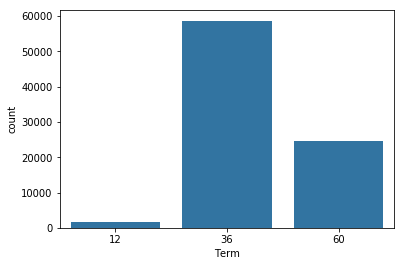

In [70]:
sb.countplot(data = target_df, x = 'Term', color = default_color)

For loan terms there are three options: 36, 60 and 12. Most common is 36 months. Next, Loan status.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

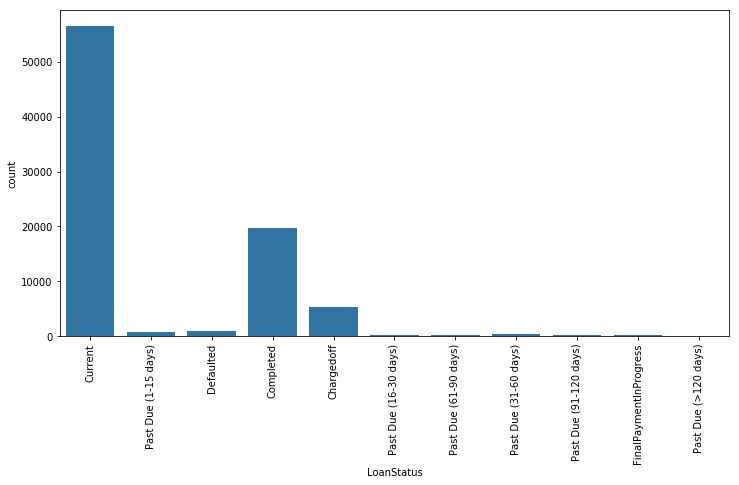

In [76]:
plt.figure(figsize=[12, 6])
plt.xticks(rotation=90)
sb.countplot(data = target_df, x = 'LoanStatus', color = default_color)

Most of the loans in the data set are actually current loans. Other big part is completed loans, defaulted loans compromise a minority, however chargedoff loans also comporomise a substanial amount. Past due loans are split in several groups based on the length of payment delay. Up next - Borrower Rate.

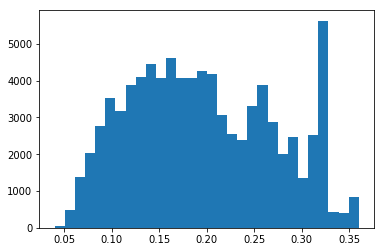

In [88]:
plt.hist(data=target_df, x='BorrowerRate', bins=30);

The distribution of the borrower rate apears to be bimodal with first peak around 0.16, larger peak (true mode) around 0.32. Let's check number of occurences:

In [96]:
target_df.BorrowerRate.value_counts().nlargest(2)

0.3177    3672
0.3199    1645
Name: BorrowerRate, dtype: int64

Turns out two most common rates are 0.3177 and 0.3199. Let's check Prosper Rating next.

Because Prosper Rating is ordinal categorial type in nature (From the highest rating A to the lowest HR) We need to convert it using pandas:

In [99]:
ordinal_list = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']


ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_list)
target_df['ProsperRating (Alpha)'] = target_df['ProsperRating (Alpha)'].astype(ordered_var)

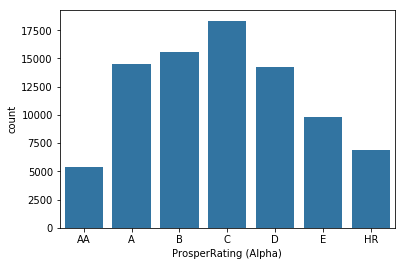

In [100]:
sb.countplot(data=target_df, x='ProsperRating (Alpha)', color=default_color)

Interestingly enough ratings are almost normaly distrubuted with the highest AA rating and the lowest rating HR are the least common and average rating C being the most common. Now let's see about purpose of the loan.

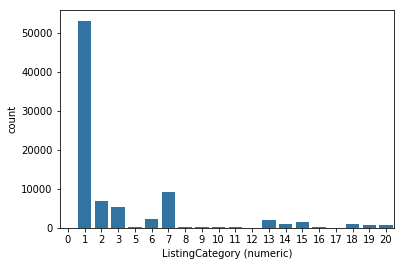

In [104]:
sb.countplot(data=target_df, x='ListingCategory (numeric)', color=default_color)

The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

The overwhelming majority of loans are used for debt consolidation. Other notable categories include Other, Home Improvement and Business. Next variable - Employment Status.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!